In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# split function for training and testing data
from sklearn.model_selection import train_test_split

# Import sequential layer generator && layer data
# Import Dense layer (all input on the current layer)
# Import Model 
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Image handler lib 
from PIL import Image

print(tf.__version__)
print(pd.__version__)

/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dty

1.14.0
1.0.4


In [2]:
labels_number = 19
epochs = 500

In [3]:
images_folder_name = 'pokemon_so_deep/result/'

In [4]:
# Read CSV labels
labels = pd.read_csv('pokemon_so_deep/pokemon.csv', delimiter = ';')
labels

,name,type_1,type_2,sprite
0,Bulbasaur,Grass,Poison,001.png
1,Ivysaur,Grass,Poison,002.png
2,Venusaur,Grass,Poison,003.png
3,Charmander,Fire,NaN,004.png
4,Charmeleon,Fire,NaN,005.png
...,...,...,...,...
885,Drakloak,Dragon,Ghost,886.png
886,Dragapult,Dragon,Ghost,887.png
887,Zacian,Fairy,Steel,888.png
888,Zamazenta,Fighting,Steel,889.png


In [5]:
pokemon_types = labels[['type_1', 'type_2']]
pokemon_types

,type_1,type_2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Fire,NaN
4,Fire,NaN
...,...,...
885,Dragon,Ghost
886,Dragon,Ghost
887,Fairy,Steel
888,Fighting,Steel


In [6]:
# Create input data
list_of_images = []

for label_sprite in labels['sprite'] :
    file = Image.open(images_folder_name + label_sprite)

    # Virer alpha
    file = file.convert('RGB')
    data = np.array( file, dtype='uint8' )
    
    # Flatten
    data_reshape = data.reshape(-1)
    
    # Divide by pixel
    data_reshape_by_pixel = data_reshape / 255
    
    list_of_images.append(data_reshape_by_pixel)

list_of_images = np.array(list_of_images)

In [7]:
# input dico for all types (dataframe)
pokemon_types_number_dic = {
    'Bug' : 0,
    'Dark' : 1,
    'Dragon' : 2,
    'Electric' : 3,
    'Fairy' : 4,
    'Fighting' : 5,
    'Fire' : 6,
    'Flying' : 7,
    'Ghost' : 8,
    'Grass' : 9,
    'Ground' : 10,
    'Ice' : 11,
    'Normal' : 12,
    'Poison' : 13,
    'Psychic' : 14,
    'Rock' : 15,
    'Steel' : 16,
    'Water' : 17,
    18 : 18
}

pokemon_types.fillna(18, inplace = True)

pokemon_types['type_1'] = pokemon_types.type_1.apply(lambda x: pokemon_types_number_dic[x])
pokemon_types['type_2'] = pokemon_types.type_2.apply(lambda x: pokemon_types_number_dic[x])

pokemon_types

/home/ulphidius/.local/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,type_1,type_2
0,9,13
1,9,13
2,9,13
3,6,18
4,6,18
...,...,...
885,2,8
886,2,8
887,4,16
888,5,16


In [8]:
# Create output data
output_array = []
for index, pokemon_type in pokemon_types.iterrows() :
    type_array = np.zeros(labels_number)
    type_array[pokemon_type['type_1']] = 1
    type_array[pokemon_type['type_2']] = 1
    output_array.append(type_array)

output_array = np.array(output_array)

In [9]:
# Split data between test end train
X_train, X_test, y_train, y_test = train_test_split(list_of_images, output_array, test_size = 0.20, random_state=42)

In [10]:
# Not working
#model = Sequential()
#model.add(Input(shape=(32, 32, 3)))
#model.add(Dense(19, activation = 'softmax'))

input_format = Input(shape=list_of_images[0].shape)
output = Dense(labels_number, activation = 'softmax')(input_format)
model = Model(inputs=input_format, outputs=output)

# Change hyper parameters
optimizer_custom = tf.keras.optimizers.RMSprop(
    learning_rate=0.000065,
    name="custom_rms"
)

model.compile(optimizer = optimizer_custom, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 19)                58387     
Total params: 58,387
Trainable params: 58,387
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Epochs number of loop over the model
fit_history = model.fit(X_train, y_train, 
                        epochs = epochs, 
                        verbose=1,
                        validation_data=(X_test, y_test))

Train on 712 samples, validate on 178 samples
Epoch 1/500
712/712 [==============================] - 0s 174us/sample - loss: 5.7323 - acc: 0.0056 - val_loss: 5.6483 - val_acc: 0.0000e+00
Epoch 2/500
712/712 [==============================] - 0s 68us/sample - loss: 5.6654 - acc: 0.0000e+00 - val_loss: 5.6389 - val_acc: 0.0000e+00
Epoch 3/500
712/712 [==============================] - 0s 72us/sample - loss: 5.6684 - acc: 0.0000e+00 - val_loss: 5.5701 - val_acc: 0.0000e+00
Epoch 4/500
712/712 [==============================] - 0s 71us/sample - loss: 5.6407 - acc: 0.0000e+00 - val_loss: 5.5055 - val_acc: 0.0000e+00
Epoch 5/500
712/712 [==============================] - 0s 65us/sample - loss: 5.6219 - acc: 0.0000e+00 - val_loss: 5.7455 - val_acc: 0.0000e+00
Epoch 6/500
712/712 [==============================] - 0s 72us/sample - loss: 5.6514 - acc: 0.0000e+00 - val_loss: 5.6943 - val_acc: 0.0000e+00
Epoch 7/500
712/712 [==============================] - 0s 66us/sample - loss: 5.6692 - acc: 0

712/712 [==============================] - 0s 61us/sample - loss: 5.1947 - acc: 0.0028 - val_loss: 5.6475 - val_acc: 0.0000e+00
Epoch 115/500
712/712 [==============================] - 0s 57us/sample - loss: 5.2099 - acc: 0.0014 - val_loss: 5.5633 - val_acc: 0.0000e+00
Epoch 116/500
712/712 [==============================] - 0s 60us/sample - loss: 5.1648 - acc: 0.0014 - val_loss: 5.6224 - val_acc: 0.0000e+00
Epoch 117/500
712/712 [==============================] - 0s 59us/sample - loss: 5.1966 - acc: 0.0056 - val_loss: 5.5933 - val_acc: 0.0000e+00
Epoch 118/500
712/712 [==============================] - 0s 61us/sample - loss: 5.2019 - acc: 0.0028 - val_loss: 5.4582 - val_acc: 0.0056
Epoch 119/500
712/712 [==============================] - 0s 62us/sample - loss: 5.1735 - acc: 0.0028 - val_loss: 5.5620 - val_acc: 0.0000e+00
Epoch 120/500
712/712 [==============================] - 0s 60us/sample - loss: 5.1862 - acc: 0.0014 - val_loss: 5.5480 - val_acc: 0.0112
Epoch 121/500
712/712 [=====

Epoch 231/500
712/712 [==============================] - 0s 57us/sample - loss: 4.8150 - acc: 0.0183 - val_loss: 5.4611 - val_acc: 0.0112
Epoch 232/500
712/712 [==============================] - 0s 58us/sample - loss: 4.8046 - acc: 0.0183 - val_loss: 5.5944 - val_acc: 0.0056
Epoch 233/500
712/712 [==============================] - 0s 59us/sample - loss: 4.8549 - acc: 0.0183 - val_loss: 5.4459 - val_acc: 0.0169
Epoch 234/500
712/712 [==============================] - 0s 63us/sample - loss: 4.8004 - acc: 0.0183 - val_loss: 5.4893 - val_acc: 0.0000e+00
Epoch 235/500
712/712 [==============================] - 0s 65us/sample - loss: 4.7788 - acc: 0.0211 - val_loss: 5.6195 - val_acc: 0.0169
Epoch 236/500
712/712 [==============================] - 0s 64us/sample - loss: 4.8591 - acc: 0.0140 - val_loss: 5.5408 - val_acc: 0.0056
Epoch 237/500
712/712 [==============================] - 0s 64us/sample - loss: 4.8544 - acc: 0.0197 - val_loss: 5.5224 - val_acc: 0.0169
Epoch 238/500
712/712 [=======

712/712 [==============================] - 0s 60us/sample - loss: 4.6192 - acc: 0.0323 - val_loss: 5.6682 - val_acc: 0.0112
Epoch 350/500
712/712 [==============================] - 0s 59us/sample - loss: 4.6204 - acc: 0.0337 - val_loss: 5.6408 - val_acc: 0.0112
Epoch 351/500
712/712 [==============================] - 0s 59us/sample - loss: 4.6166 - acc: 0.0337 - val_loss: 5.6909 - val_acc: 0.0056
Epoch 352/500
712/712 [==============================] - 0s 60us/sample - loss: 4.6183 - acc: 0.0365 - val_loss: 5.5865 - val_acc: 0.0112
Epoch 353/500
712/712 [==============================] - 0s 67us/sample - loss: 4.5817 - acc: 0.0421 - val_loss: 5.4963 - val_acc: 0.0169
Epoch 354/500
712/712 [==============================] - 0s 63us/sample - loss: 4.5575 - acc: 0.0435 - val_loss: 5.4986 - val_acc: 0.0169
Epoch 355/500
712/712 [==============================] - 0s 64us/sample - loss: 4.5561 - acc: 0.0337 - val_loss: 5.4219 - val_acc: 0.0169
Epoch 356/500
712/712 [=========================

712/712 [==============================] - 0s 61us/sample - loss: 4.3524 - acc: 0.0618 - val_loss: 5.5658 - val_acc: 0.0112
Epoch 468/500
712/712 [==============================] - 0s 62us/sample - loss: 4.3211 - acc: 0.0674 - val_loss: 5.6896 - val_acc: 0.0112
Epoch 469/500
712/712 [==============================] - 0s 59us/sample - loss: 4.3761 - acc: 0.0604 - val_loss: 5.6138 - val_acc: 0.0169
Epoch 470/500
712/712 [==============================] - 0s 61us/sample - loss: 4.3977 - acc: 0.0590 - val_loss: 5.7164 - val_acc: 0.0169
Epoch 471/500
712/712 [==============================] - 0s 63us/sample - loss: 4.3839 - acc: 0.0562 - val_loss: 5.7341 - val_acc: 0.0169
Epoch 472/500
712/712 [==============================] - 0s 62us/sample - loss: 4.3452 - acc: 0.0576 - val_loss: 5.6587 - val_acc: 0.0169
Epoch 473/500
712/712 [==============================] - 0s 60us/sample - loss: 4.3290 - acc: 0.0632 - val_loss: 5.7112 - val_acc: 0.0112
Epoch 474/500
712/712 [=========================

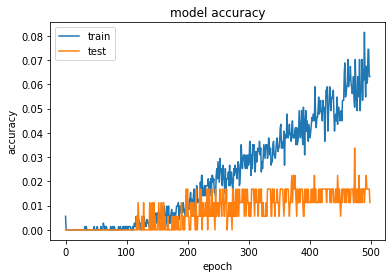

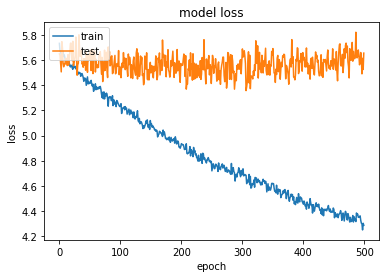

In [13]:
plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save('pokemon_so_deep/pokemon_linear_perceptron_model.h5')